<h1><center><center><h1><h1><center><span style="color:#2189b5">Linear Regression with Multiple Variables</span><center><h1>

## In this notebook, we will implement linear regression with multiple variables to predict the prices of houses, using scikit-learn.

### Introduction :
Suppose you are selling your house and want to know what would be a good price to list it at. You have a dataset of houses with features such as the size of the house, the number of bedrooms, and the age of the house, along with their corresponding prices.

You would like to use this data to build a linear regression model that can predict the price of a house based on its features.

### This notebook contains :
The dataset for our linear regression problem. The first column is the size of the house in square feet, the second column is the number of bedrooms, and the third column is the House Age, forth column is the Price of the house.

### Task : 
Build a linear regression model to predict the price of a house based on its size and number of bedrooms, using scikit-learn.

1.Perform exploratory data analysis (EDA) to understand the dataset.<br>
2.Implement feature scaling to normalize the features.<br>
3.Use scikit-learn's LinearRegression model to fit the data and learn the parameters.<br>
4.Use the trained model to predict the price of a house with 1650 square feet and 3 bedrooms.

### Bonus Task : 
1.Implement gradient descent or normal equation to solve for the optimal parameters without using scikit-learn.<br>
2.Compare the results of the scikit-learn model with the results from the custom implementation.

# Libraries you will need :


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# The Dataset :
### Just run this code for the datasets...

In [3]:
house_sizes = [1500, 2000, 1600, 1200, 1800, 2200, 1300, 1900, 2100, 1700, 1400, 2000, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500]
bedrooms = [3, 4, 3, 2, 3, 4, 2, 4, 4, 3, 2, 4, 2, 2, 3, 3, 4, 4, 4, 5]
ages = [10, 5, 8, 15, 3, 2, 12, 6, 4, 9, 13, 7, 14, 11, 10, 8, 5, 2, 1, 6]
prices = [250000, 350000, 275000, 200000, 320000, 400000, 220000, 380000, 390000, 300000, 240000, 350000, 190000, 230000, 260000, 280000, 360000, 400000, 420000, 450000]

df = pd.DataFrame({'Size': house_sizes, 'Bedrooms': bedrooms, 'House Age': ages, 'Price': prices})
df

,Size,Bedrooms,House Age,Price
0,1500,3,10,250000
1,2000,4,5,350000
2,1600,3,8,275000
3,1200,2,15,200000
4,1800,3,3,320000
5,2200,4,2,400000
6,1300,2,12,220000
7,1900,4,6,380000
8,2100,4,4,390000
9,1700,3,9,300000


<h1><font color='#2189b5'> Perform exploratory data analysis (EDA) to understand the dataset.</font></h1>
<br><br>

#### 1 - First understand how does each feature in the dataset effects the `price` of the house :

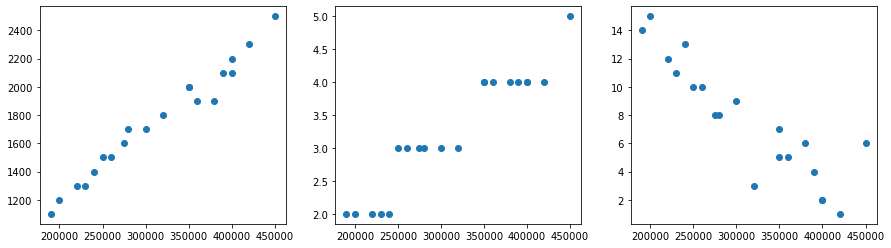

In [4]:
## 1 - Write your code here :

fig, ax = plt.subplots(1,3, figsize= (15,4), sharex= True )

ax[0].scatter(x= df['Price'], y=df['Size'])
ax[1].scatter(x= df['Price'], y=df['Bedrooms'])
ax[2].scatter(x= df['Price'], y=df['House Age'])

plt.show()

<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    Use Scatter Plots ;)
</details>

<br><br>

#### 2 - Second Visualize the distribution of each of the continous features of the data :

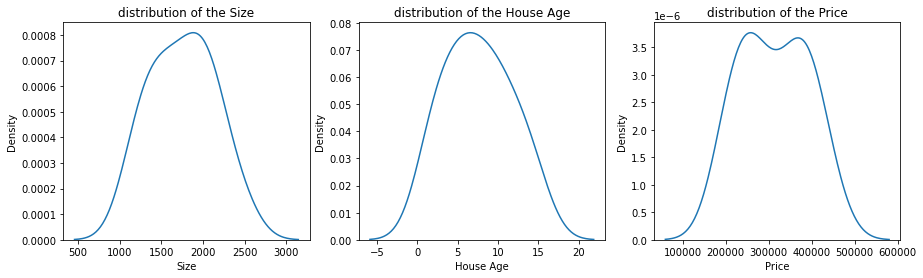

In [5]:
## 2 - Write your code here :

fig, ax = plt.subplots(1,3, figsize= (15,4))

sns.kdeplot(df['Size'], ax=ax[0])
sns.kdeplot(df['House Age'], ax=ax[1])
sns.kdeplot(df['Price'], ax=ax[2])


ax[0].set_title('distribution of the Size')
ax[1].set_title('distribution of the House Age')
ax[2].set_title('distribution of the Price')



plt.show()

<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    Use KDE Plots ;)
</details>

<br><br>

<h1><font color='#2189b5'>Briefly describe the insights you got after visualizing the data :</font></h1>
<br><br>

## 3 - Write what you noticed here :

* the continuous varibles are normally distributed so it doesn't need any transformation
* the numeric data has different scales so it needs to be scaled
* the price has positive relation with the `Size` and `Bedrooms` variables but it has a negative one with the `House Age` which makes sense

<h1><font color='#2189b5'>Look again at the dataframe then...</font></h1><br>
- Store the target variable (price) in a variable y.<br>
- Store the features in variable x.


In [6]:
# 4 - Write your code here :

y= df['Price']
x= df.drop(['Price'], axis=1)

<h1><font color='#2189b5'>Now for data preprocessing... implement feature scaling to normalize the features. </font></h1>
<br><br>

#### there is many scaling methods found in sklearn.preprocessing 
https://scikit-learn.org/stable/modules/preprocessing.html

#### Use Scaling to scale the features (Note you only scale x) :

In [7]:
## 5 - write your code here :

from sklearn.preprocessing import MinMaxScaler

min_max_scaler= MinMaxScaler(feature_range=(-1,1))

x_train= pd.DataFrame(min_max_scaler.fit_transform(x))

<h1><font color='#2189b5'>Based on the previous data let's build our Machine Learning model...</font></h1>
<br><br>

#### import linear regression from sklearn

In [8]:
# 6 - Write your code here :

from sklearn.linear_model import LinearRegression


<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    from sklearn.linear_model import LinearRegression
</details>

<br><br>

#### Ok remember that we imported LinearRegression from sklearn, now We want to create object from this class....<br><br>Make object from LinearRegression class and name it as `lr`

In [9]:
# 7 - Write your code here :

lr= LinearRegression()


#### Fit your linear regression model on the training data that you have, which is x and y...

In [10]:
# 8 - Write your code here :

lr.fit(x, y)


LinearRegression()

#### Let's have a look on the parameters of the model that you trained :)

In [11]:
# 9 - Write your code here :

lr.intercept_, lr.coef_

(30909.226140731247, array([  142.31756644, 15663.56342972, -2428.22998496]))

<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    to get weights use : lr.coef_ <br><br>
    to get bias use : lr.intercept_
</details>

<br><br>


<h1><font color='#2189b5'>Now your model is trained and it is now ready for making new predictions</font></h1>
<h3><font color='blue'>Note that to make new predictions you should make same scaling and preprocessing on the new test data also...</font></h3>
<br><br>

#### Use the trained model to predict the price of a house with `1650 square feet`, `3 bedrooms` and `7 years age`.

In [12]:
# 10 - Write your code here :
values = np.array([[1650, 3, 7]])

scaled_values= min_max_scaler.transform(values)

price= lr.predict(scaled_values)

price

array([26004.4317073])

<br><br>
<h1><font color='BLUE'>BONUS Questions : </font></h1>

#### Implement gradient descent or normal equation to solve for the optimal parameters without using scikit-learn.

In [13]:
from sklearn.preprocessing import add_dummy_feature

x_b = add_dummy_feature(x) # add x0 = 1 to each instance

theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

theta_best


array([30909.22614075,   142.31756644, 15663.56342972, -2428.22998496])

#### Compare the results of the scikit-learn model with the results from the custom implementation.

In [14]:
## Write your code here :

values = np.array([[1650, 3, 7]])

scaled_values= min_max_scaler.transform(values)

scaled_values_b = add_dummy_feature(scaled_values) # add x0 = 1 to each instance

price = scaled_values_b @ theta_best

price

array([26004.43170732])